# Import the relevant libraries

In [1]:
import pandas as pd
import seaborn as sb
sb.set()

In [3]:
# Read data
summer_df = pd.read_csv("cleaned_datasets/summer_dataset.csv")
winter_df = pd.read_csv("cleaned_datasets/winter_dataset.csv")

# Clustering

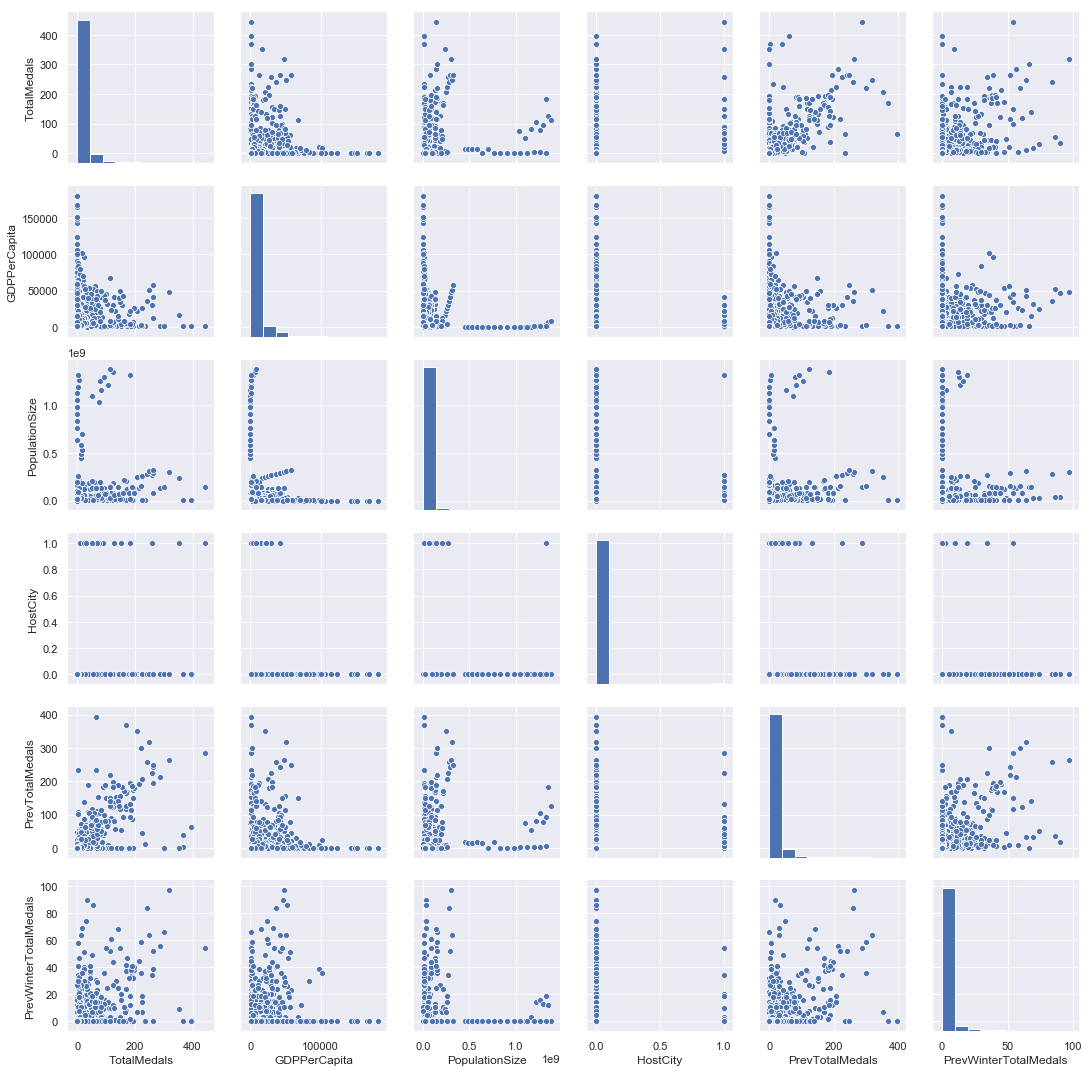

In [4]:
# Extract the Features from the Data
clusterX = pd.DataFrame(summer_df[["TotalMedals", "GDPPerCapita", "PopulationSize", "HostCity", "PrevTotalMedals", "PrevWinterTotalMedals"]])

# Plot the Raw Data on 2D grids
sb.pairplot(clusterX)

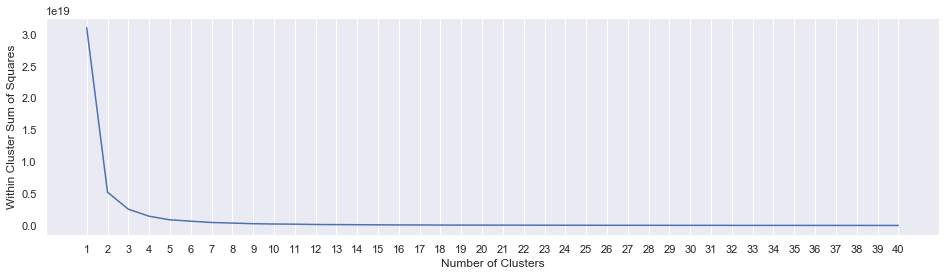

In [6]:
# Plot angle plot to decide number of clusters
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt 
import numpy as np
# Vary the Number of Clusters
min_clust = 1
max_clust = 40
init_algo = 'k-means++'

# Compute Within Cluster Sum of Squares
within_ss = []
for num_clust in range(min_clust, max_clust+1):
    kmeans = KMeans(n_clusters = num_clust, init = init_algo, n_init = 5)
    kmeans.fit(clusterX)
    within_ss.append(kmeans.inertia_)

# Angle Plot : Within SS vs Number of Clusters
f, axes = plt.subplots(1, 1, figsize=(16,4))
plt.plot(range(min_clust, max_clust+1), within_ss)
plt.xlabel('Number of Clusters')
plt.ylabel('Within Cluster Sum of Squares')
plt.xticks(np.arange(min_clust, max_clust+1, 1.0))
plt.grid(which='major', axis='y')
plt.show()

In [7]:
# Import essential models from sklearn
from sklearn.cluster import KMeans

# Set "optimal" Clustering Parameters = 3
num_clust = 3
init_algo = 'k-means++'

# Create Clustering Model using KMeans
kmeans = KMeans(n_clusters = num_clust,         
               init = init_algo,
               n_init = 20)                 

# Fit the Clustering Model on the Data
kmeans.fit(clusterX)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=3, n_init=20, n_jobs=None, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

Factors 	TotalMedals 	GDPPerCapita 	PopulationSize 		HostCity 	PrevTotalMedals  PrevWinterTotalMedals

Cluster 0:	10.31		6708.05		11686699.13		0.0		8.56		1.68		
Cluster 1:	53.67		1423.56		1126677769.76		0.05		45.62		4.48		
Cluster 2:	76.08		9127.37		175911404.03		0.05		69.43		11.56		

Within Cluster Sum of Squares : 2.553712022236474e+18



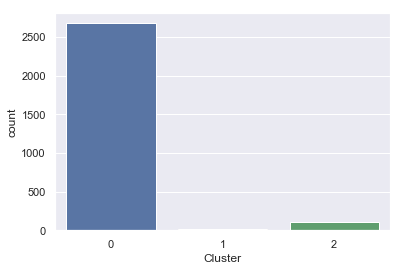

In [8]:
# Print the Cluster Centers
print("Factors", "\tTotalMedals", "\tGDPPerCapita", "\tPopulationSize", "\t\tHostCity", "\tPrevTotalMedals", " PrevWinterTotalMedals")
print()

for i, center in enumerate(kmeans.cluster_centers_):
    print("Cluster", i, end=":\t")
    for coord in center:
        print(round(coord, 2), end="\t\t")
    print()
print()

# Print the Within Cluster Sum of Squares
print("Within Cluster Sum of Squares :", kmeans.inertia_)
print()

# Predict the Cluster Labels
labels = kmeans.predict(clusterX)

# Append Labels to the Data
X_labeled = clusterX.copy()
X_labeled["Cluster"] = pd.Categorical(labels)

# Summary of the Cluster Labels
sb.countplot(X_labeled["Cluster"])

/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


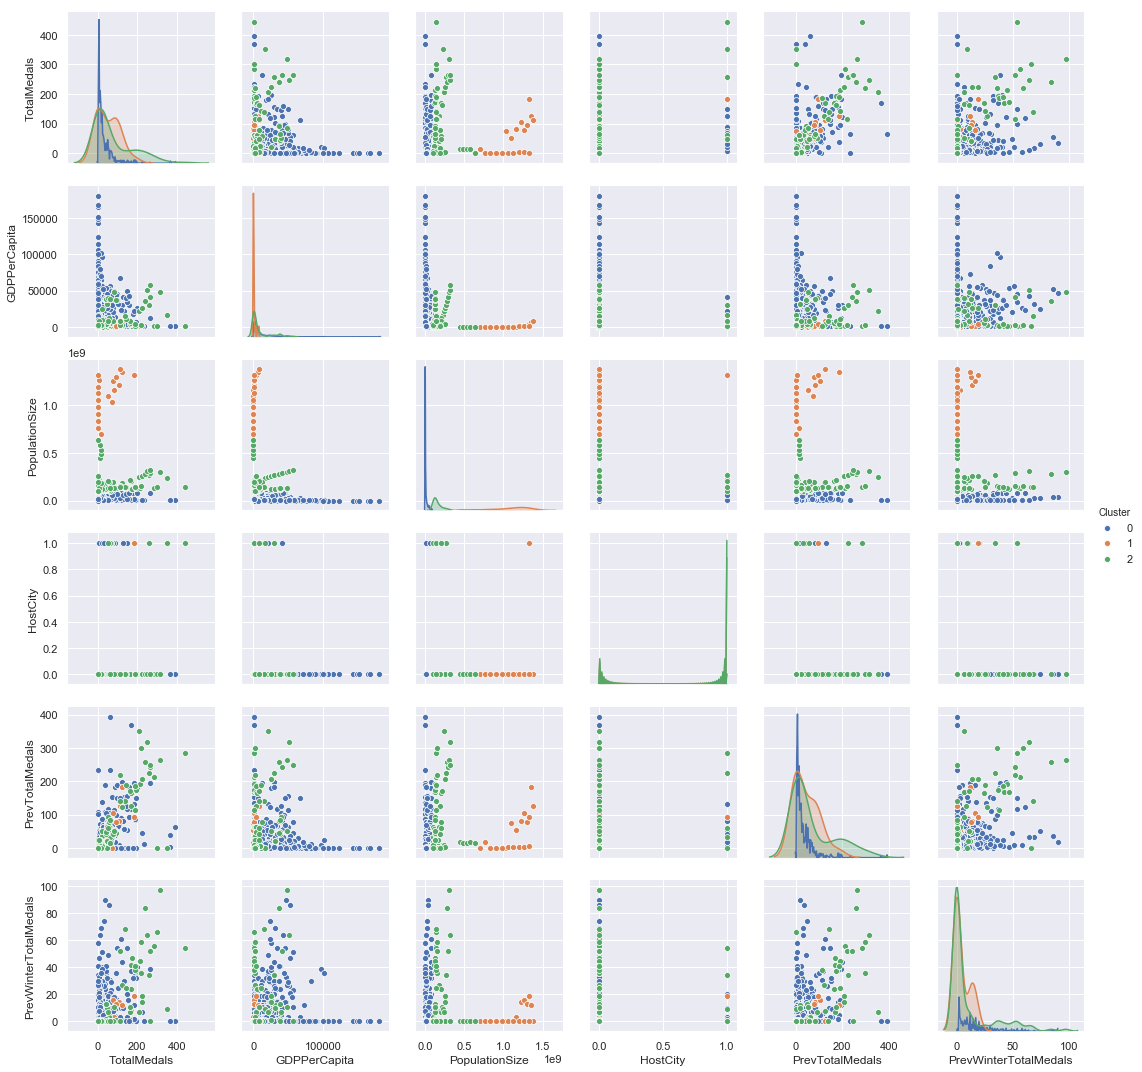

In [9]:
# Plot the Clusters on 2D grids
sb.pairplot(X_labeled, vars = clusterX.columns.values, hue = "Cluster")

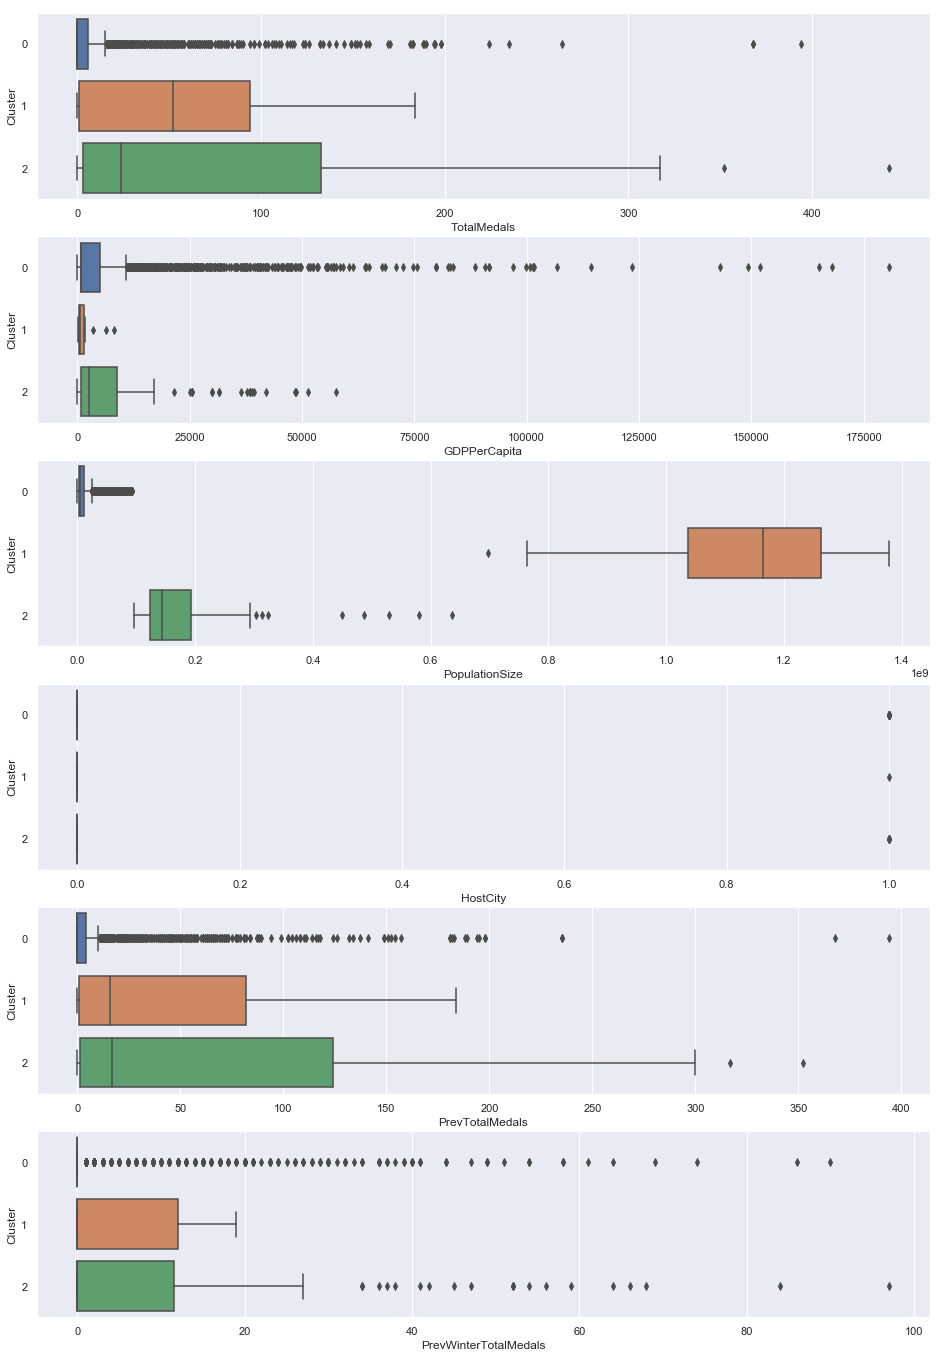

In [10]:
# Boxplots for all Features against the Clusters
f, axes = plt.subplots(6, 1, figsize=(16,24))
sb.boxplot(x = 'TotalMedals', y = 'Cluster', data = X_labeled, ax = axes[0])
sb.boxplot(x = 'GDPPerCapita', y = 'Cluster', data = X_labeled, ax = axes[1])
sb.boxplot(x = 'PopulationSize', y = 'Cluster', data = X_labeled, ax = axes[2])
sb.boxplot(x = 'HostCity', y = 'Cluster', data = X_labeled, ax = axes[3])
sb.boxplot(x = 'PrevTotalMedals', y = 'Cluster', data = X_labeled, ax = axes[4])
sb.boxplot(x = 'PrevWinterTotalMedals', y = 'Cluster', data = X_labeled, ax = axes[5])

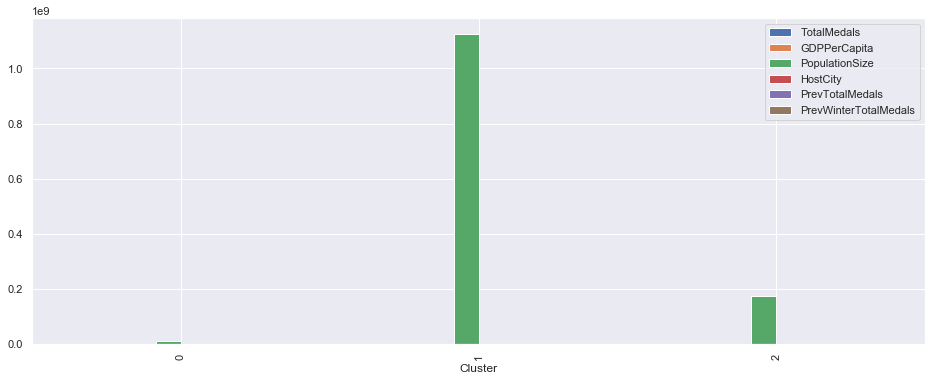

In [11]:
# Average Behaviour of each Cluster
cluster_data = pd.DataFrame(X_labeled.groupby(by = "Cluster").mean())
cluster_data.plot.bar(figsize = (16,6))

# Anomaly Detection

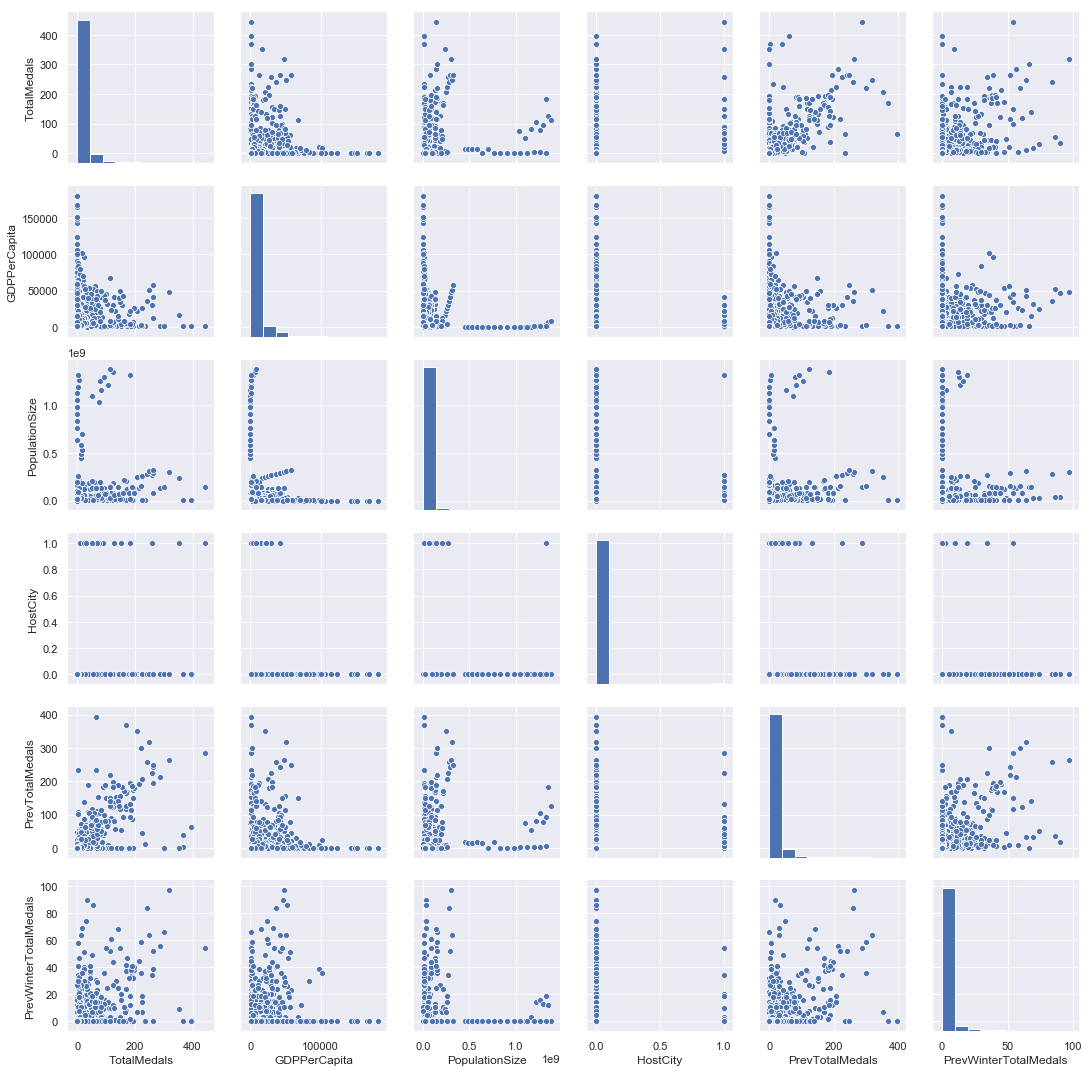

In [12]:
# Extract the Features from the Data
anomalyX = pd.DataFrame(summer_df[["TotalMedals", "GDPPerCapita", "PopulationSize", "HostCity", "PrevTotalMedals", "PrevWinterTotalMedals"]])

# Plot the Raw Data on 2D grids
sb.pairplot(anomalyX)

In [15]:
# Import LocalOutlierFactor from sklearn.neighbors
from sklearn.neighbors import LocalOutlierFactor

# Set the Parameters for Neighborhood
num_neighbors = 20      # Number of Neighbors
cont_fraction = 0.05    # Fraction of Anomalies

# Create Anomaly Detection Model using LocalOutlierFactor
lof = LocalOutlierFactor(n_neighbors = num_neighbors, contamination = cont_fraction)

# Fit the Model on the Data and Predict Anomalies
lof.fit(anomalyX)

LocalOutlierFactor(algorithm='auto', contamination=0.05, leaf_size=30,
          metric='minkowski', metric_params=None, n_jobs=None,
          n_neighbors=20, novelty=False, p=2)

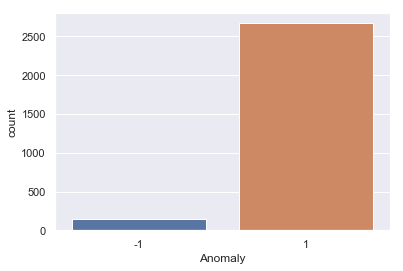

In [16]:
# Predict the Anomalies
labels = lof.fit_predict(anomalyX)

# Append Labels to the Data
anomalyX_labeled = anomalyX.copy()
anomalyX_labeled["Anomaly"] = pd.Categorical(labels)

# Summary of the Anomaly Labels
sb.countplot(anomalyX_labeled["Anomaly"])

/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
/anaconda3/lib/python3.7/site-packages/statsmodels/nonparametric/kde.py:488: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
/anaconda3/lib/python3.7/site-packages/statsmodels/nonparametric/kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2
/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:83: RuntimeWarning: invalid value encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


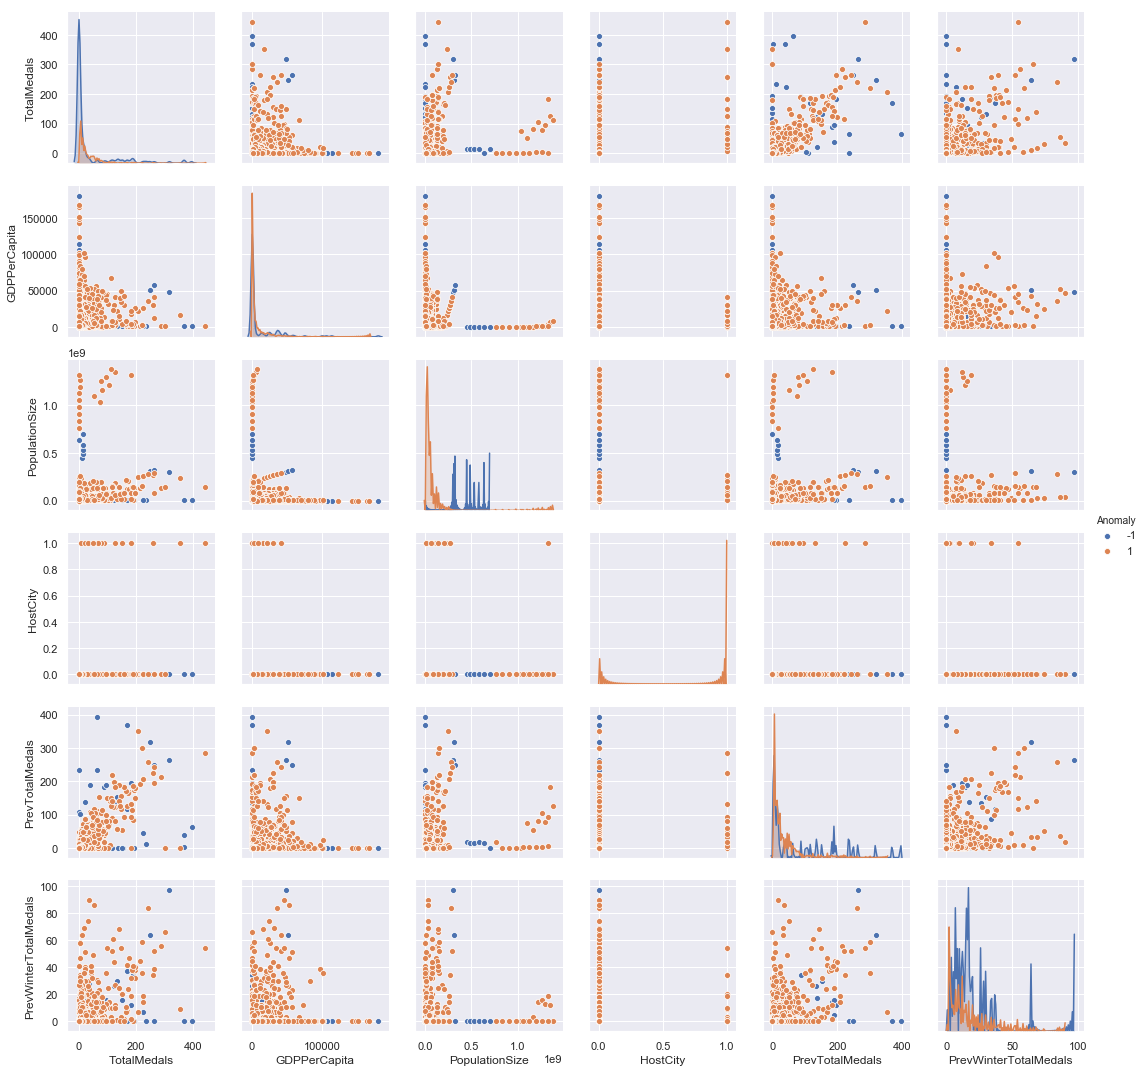

In [17]:
# Visualize the Anomalies in the Data
sb.pairplot(anomalyX_labeled, vars = anomalyX.columns.values, hue = "Anomaly")

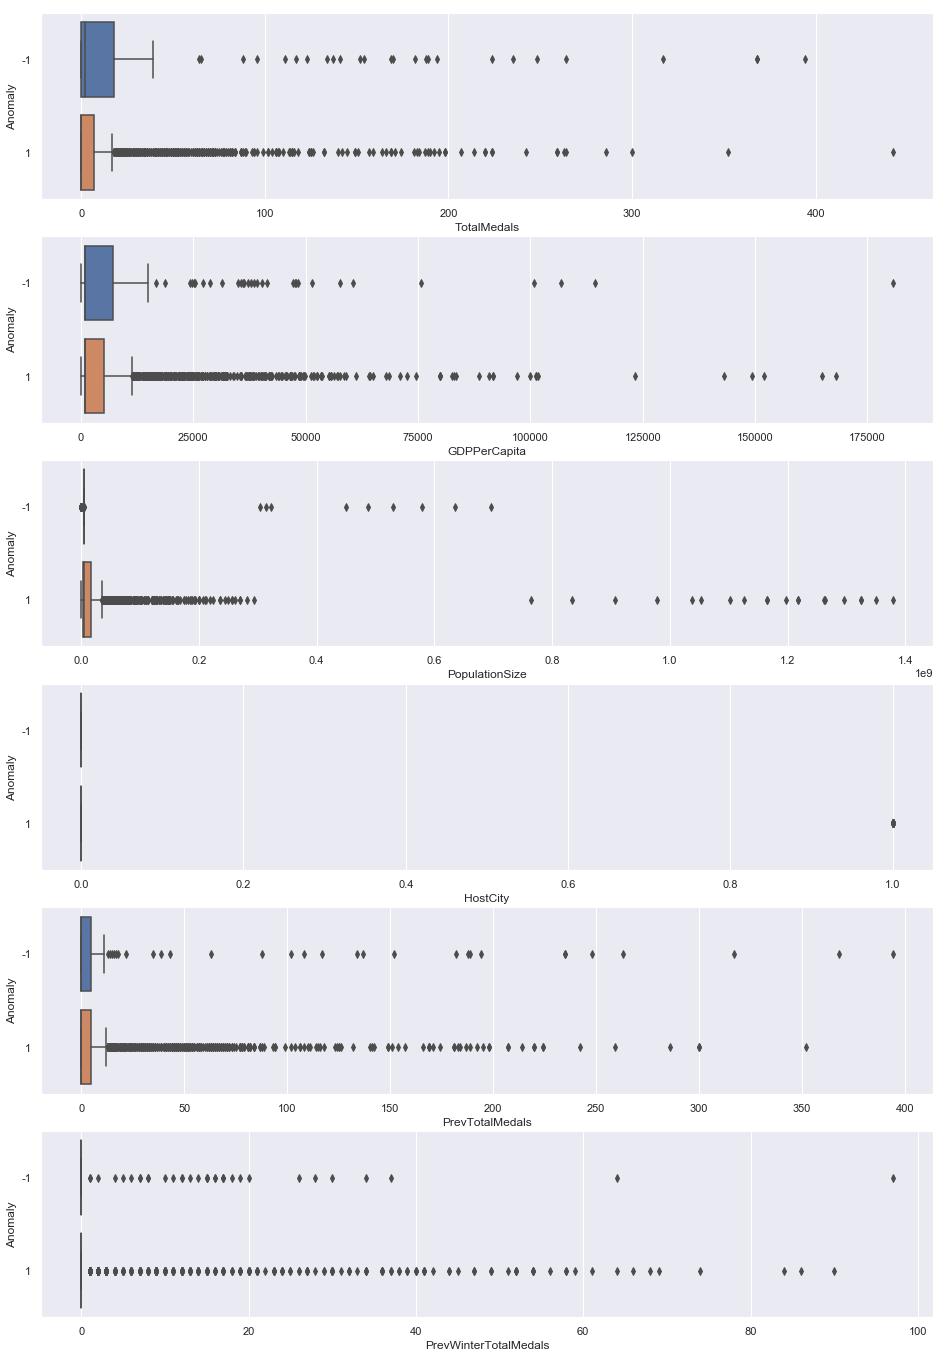

In [18]:
# Boxplots for all Features against the Anomalies
f, axes = plt.subplots(6, 1, figsize=(16,24))
sb.boxplot(x = 'TotalMedals', y = 'Anomaly', data = anomalyX_labeled, ax = axes[0])
sb.boxplot(x = 'GDPPerCapita', y = 'Anomaly', data = anomalyX_labeled, ax = axes[1])
sb.boxplot(x = 'PopulationSize', y = 'Anomaly', data = anomalyX_labeled, ax = axes[2])
sb.boxplot(x = 'HostCity', y = 'Anomaly', data = anomalyX_labeled, ax = axes[3])
sb.boxplot(x = 'PrevTotalMedals', y = 'Anomaly', data = anomalyX_labeled, ax = axes[4])
sb.boxplot(x = 'PrevWinterTotalMedals', y = 'Anomaly', data = anomalyX_labeled, ax = axes[5])